# Analysis of Clothing_Store data from New England 

In [ ]:
About Dataset:The clothing_store data set represents actual data provided by a clothing store chain in New England.

Goal : Our task is to develop a model that will maximize profits for direct-mail marketing (id est. a model that would identify customers who will respond to a direct-mail marketing promotion, based on information collected about the customers). However, it will not be sufficient just to derive the model with the most accurate predictions. We should also consider how the problem fits into the business goal of maximizing profits. 

Primary Objective : Develop a classification model that will maximize profits for direct-mail marketing.

# Part 1 : Data Preprocessing Phase

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [210]:
df2=pd.read_csv("E:/sakshi/all subjects of MS/Trimester 6/Predictive Analytics/Final/Clothing_store_training_test.csv")

# Shape of the data

In [211]:
df2.shape

(2847, 119)

# Top 10 Records of data

In [212]:
df2.head(10)

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
0,9.955600e+12,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,4.709530,3.459781,0.000000,F,F,T,0.000000,0.000000,F,F
1,9.955600e+12,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,3.772761,3.487987,1.414214,T,T,T,9.055937,10.954451,T,T
2,9.955600e+12,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,4.228293,4.605170,0.000000,F,F,T,0.000000,0.000000,F,F
3,9.955600e+12,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,3.294354,3.147165,2.449490,F,T,T,10.244023,16.399085,T,T
4,9.955600e+12,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,3.198673,3.350606,0.000000,F,F,T,9.350936,0.000000,F,T
5,9.955600e+12,1106,26,2,120.00,0,60.00,11,0.00,0.56,...,4.283587,3.888550,0.000000,F,F,T,0.000000,7.615773,T,F
6,9.955600e+12,1108,98,3,450.98,0,150.32,11,0.16,0.06,...,3.415100,3.056357,1.732051,F,T,T,0.000000,15.667801,T,F
7,9.955600e+12,1106,64,5,521.20,1,104.24,11,0.16,0.07,...,3.238678,2.793004,0.000000,T,F,T,NaN,19.645356,T,F
8,9.955600e+12,1118,145,1,782.08,1,782.08,11,0.12,0.00,...,3.590439,3.676554,0.000000,F,F,T,0.000000,27.965693,T,F
9,9.955600e+12,1106,356,1,79.00,0,79.00,11,0.00,0.00,...,5.003946,4.605170,1.000000,F,T,T,0.000000,0.000000,F,F


# Statistical terms of data

In [213]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HHKEY,2847.0,9.955602e+12,4.079115e+06,9.955600e+12,9.955600e+12,9.955600e+12,9.955600e+12,9.955610e+12
ZIP_CODE,2847.0,9.245543e+03,6.260037e+03,1.001000e+03,6.416000e+03,8.225000e+03,1.176500e+04,9.535400e+04
REC,2847.0,1.305297e+02,1.069485e+02,1.000000e+00,3.600000e+01,1.010000e+02,2.160000e+02,3.640000e+02
FRE,2847.0,5.340710e+00,6.888264e+00,1.000000e+00,1.000000e+00,3.000000e+00,6.000000e+00,1.150000e+02
MON,2847.0,4.991460e+02,8.127676e+02,5.990000e+00,1.319800e+02,2.644600e+02,5.836400e+02,2.414033e+04
...,...,...,...,...,...,...,...,...
ln lifetime ave time betw visits,2846.0,3.901134e+00,1.053396e+00,-4.462870e-01,3.159019e+00,3.923061e+00,4.703476e+00,5.897154e+00
ln product uniformity,2846.0,3.377487e+00,7.579234e-01,-8.209810e-01,2.889816e+00,3.394005e+00,3.916961e+00,5.298317e+00
sqrt responded,2846.0,7.289055e-01,8.554409e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.414214e+00,3.162278e+00
sqrt spending months 2 3,2785.0,4.211565e+00,6.411300e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.303614e+00,4.191360e+01


# Remove Missing Values from data

In [214]:
df1 = df2
df=df1.dropna()
df

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
0,9.955600e+12,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,4.709530,3.459781,0.000000,F,F,T,0.000000,0.000000,F,F
1,9.955600e+12,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,3.772761,3.487987,1.414214,T,T,T,9.055937,10.954451,T,T
2,9.955600e+12,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,4.228293,4.605170,0.000000,F,F,T,0.000000,0.000000,F,F
3,9.955600e+12,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,3.294354,3.147165,2.449490,F,T,T,10.244023,16.399085,T,T
4,9.955600e+12,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,3.198673,3.350606,0.000000,F,F,T,9.350936,0.000000,F,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,9.955610e+12,15601,166,4,96.48,0,24.12,11,0.31,0.00,...,3.606584,3.109507,0.000000,F,F,T,0.000000,4.472136,T,F
2842,9.955610e+12,15601,51,8,528.32,1,66.04,16,0.17,0.00,...,2.925310,3.146305,2.236068,F,T,T,9.404786,11.055768,T,T
2843,9.955610e+12,15650,289,2,85.75,0,42.87,11,1.00,0.00,...,5.030438,4.605170,0.000000,F,F,T,0.000000,0.000000,F,F
2844,9.955610e+12,15601,33,7,259.42,0,37.06,11,0.41,0.09,...,3.756538,3.299165,1.414214,F,T,T,10.341180,7.681146,T,T


# All Null values removed

In [215]:
df.isnull().sum()

HHKEY                         0
ZIP_CODE                      0
REC                           0
FRE                           0
MON                           0
                             ..
flag markdown                 0
sqrt spending months 2 3      0
sqrt spending months 4 5 6    0
flag spending months 4 5 6    0
flag spending months 2 3      0
Length: 119, dtype: int64

# Information of each Variable in dataset

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2845
Columns: 119 entries, HHKEY to flag spending months 2 3
dtypes: float64(85), int64(5), object(29)
memory usage: 2.4+ MB


# Columns in dataset

In [217]:
column_names = df.columns.values.tolist()
column_names

['HHKEY',
 'ZIP_CODE',
 'REC',
 'FRE',
 'MON',
 'CC_CARD',
 'AVRG',
 'PC_CALC20',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',
 'AMSPEND',
 'PSSPEND',
 'CCSPEND',
 'AXSPEND',
 'TMONSPEND',
 'OMONSPEND',
 'SMONSPEND',
 'PREVPD',
 'GMP',
 'PROMOS',
 'DAYS',
 'FREDAYS',
 'MARKDOWN',
 'CLASSES',
 'COUPONS',
 'STYLES',
 'STORES',
 'STORELOY',
 'VALPHON',
 'WEB',
 'MAILED',
 'RESPONDED',
 'RESPONSERATE',
 'HI',
 'LTFREDAY',
 'CLUSTYPE',
 'PERCRET',
 'RESP',
 'Tot_Spend',
 'Sales per Visit',
 'Spending_Month_2_3',
 'Spending_Month_4_5_6',
 'bc purchase visits',
 'ln total net sales',
 'ln_ave spending per visit',
 'sqrt sweaters',
 'sqrt knit tops',
 'sqrt knit dresses',
 'sqrt blouses',
 'sqrt jackets',
 'sqrt career pants',
 'sqrt casual pants',
 'sqrt shirts',
 'sqrt dresses',
 'sqrt suits',
 'sqrt outerwear',
 'sqrt jewelry',
 'sqrt f

# Part 2 : Exploratory Data Analysis

# Separate numeric and categorical variables
Seperated Categorical and numerical variables for EDA ,because it was difficult to make histogram of all variables.

In [218]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [219]:
numeric_data.shape

(2619, 90)

In [220]:
categorical_data.shape

(2619, 29)

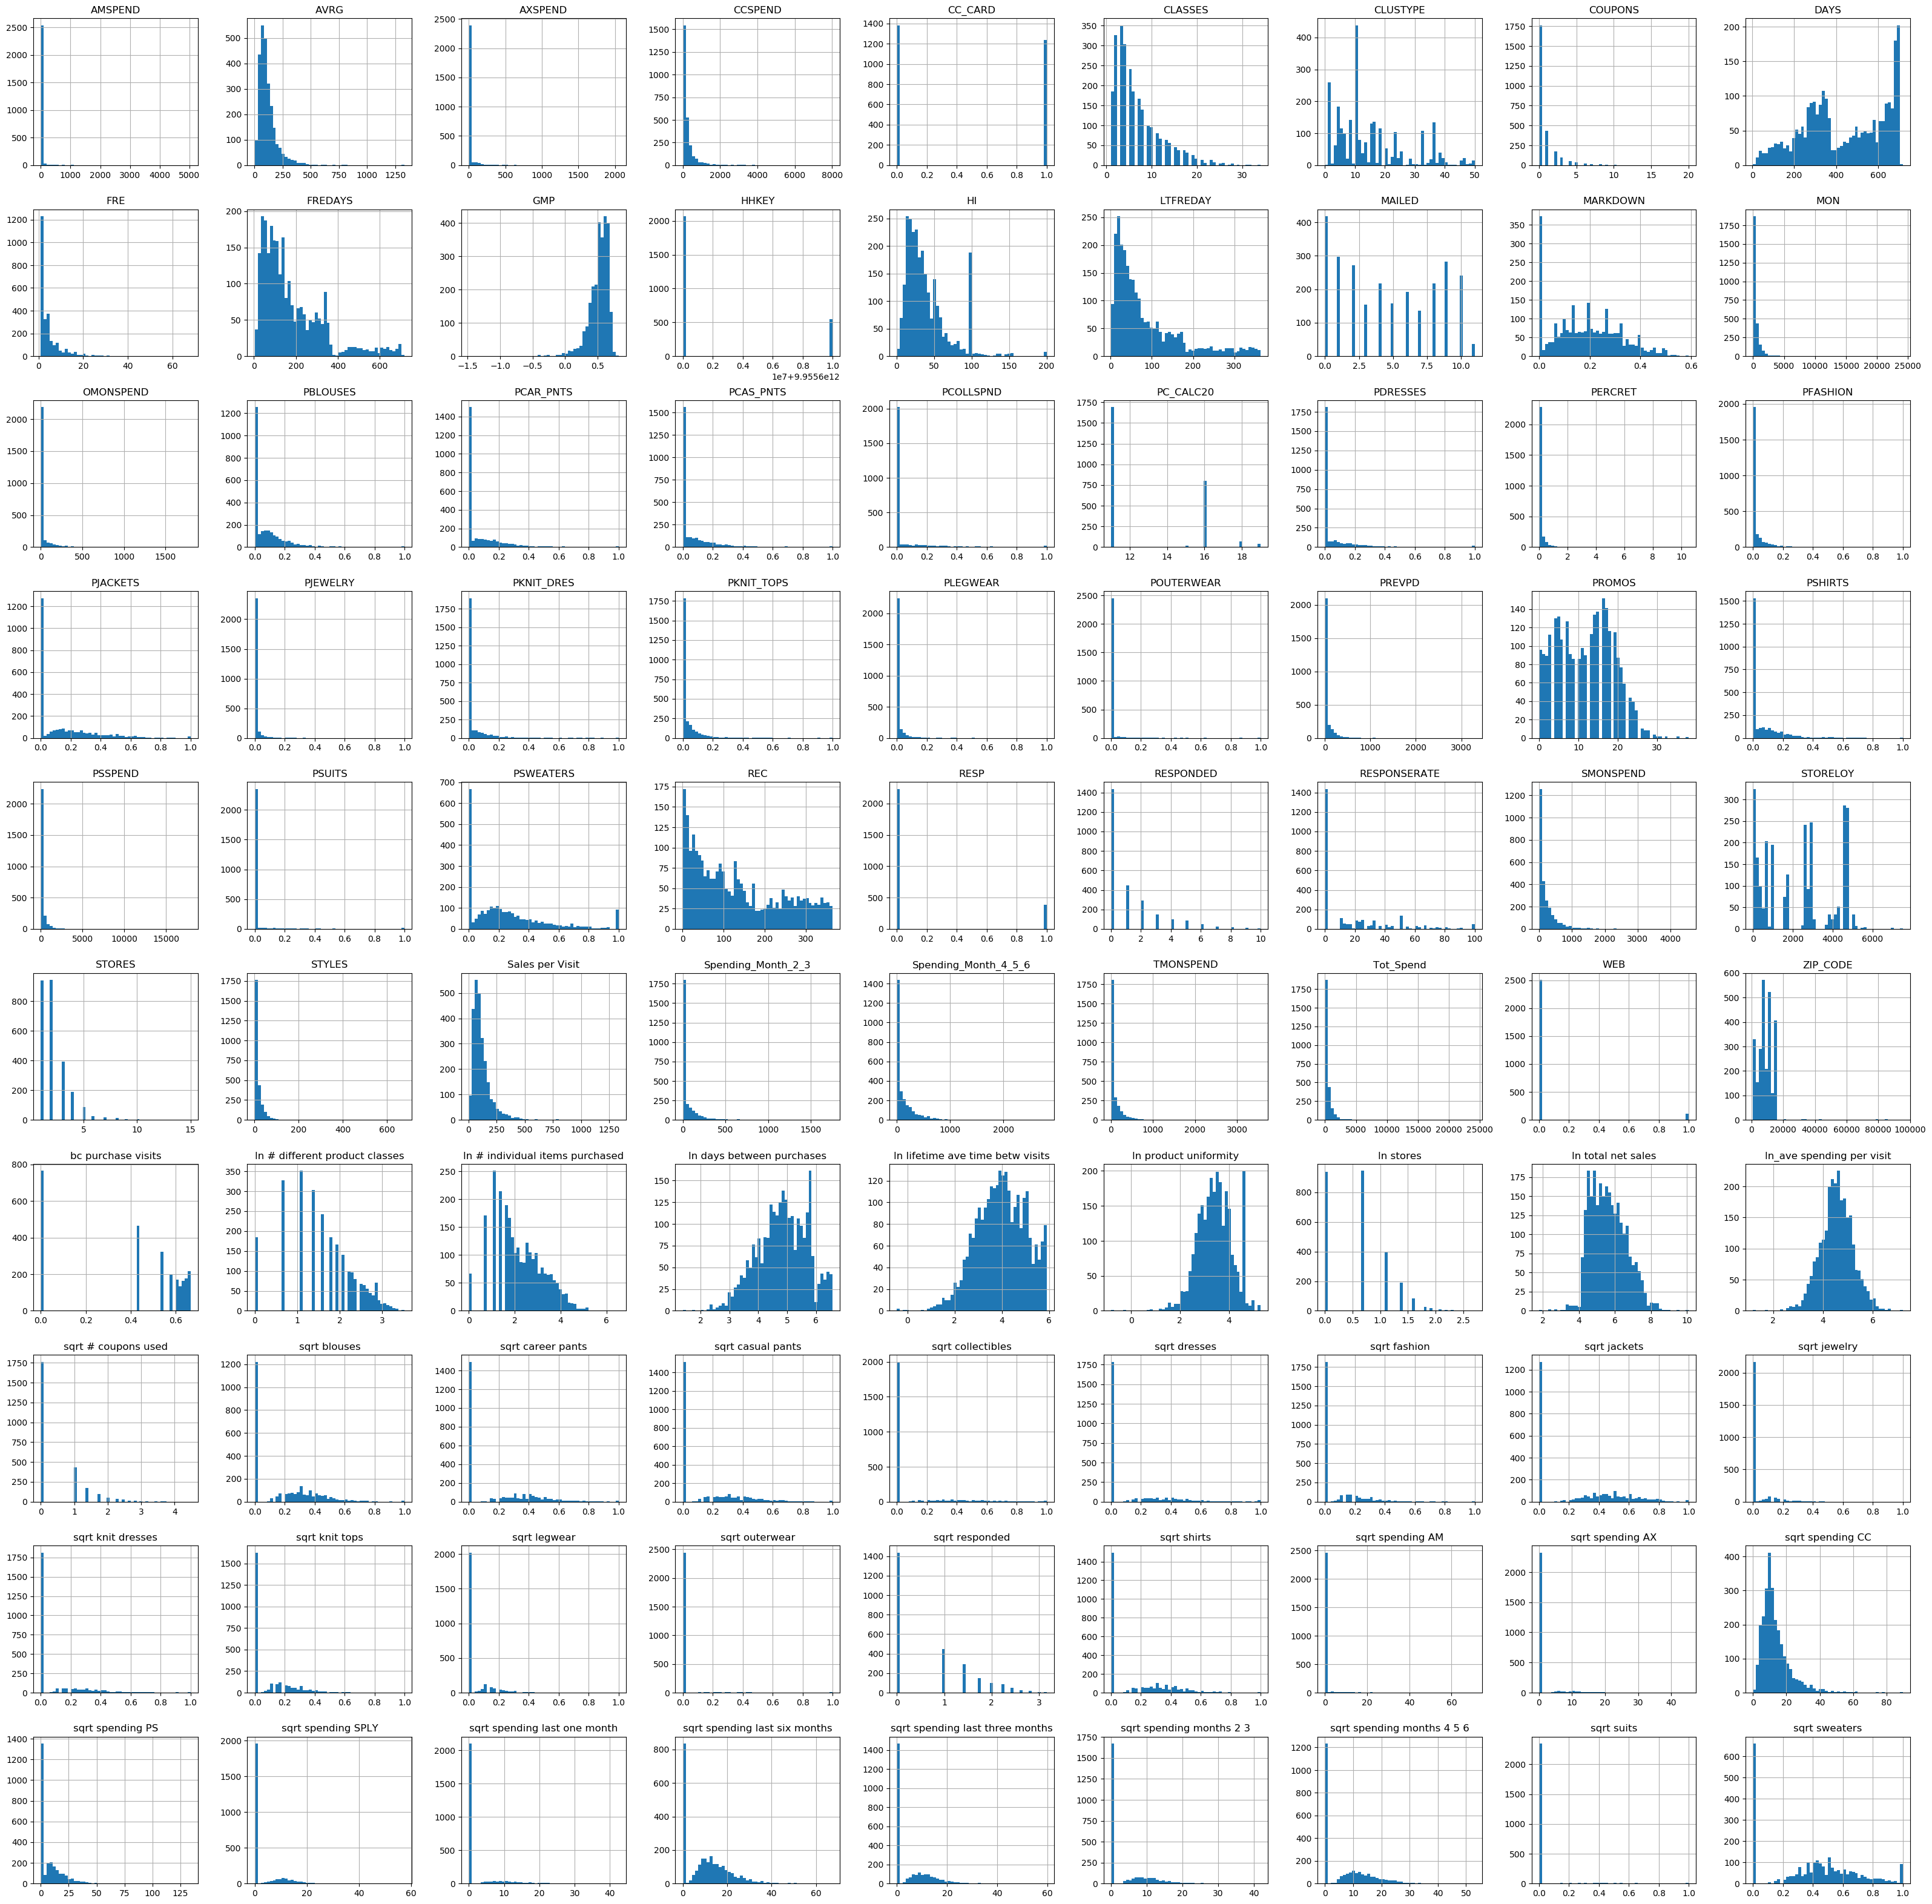

In [221]:
numeric_data.hist(bins=50, figsize=(40,40))
#plt.tight_layout()    
plt.show()

In [222]:
df=df.drop(['HHKEY','ZIP_CODE'], axis=1)
df=pd.get_dummies(df,drop_first=True)

# Multicollinearity(VIF)
VIF quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that
measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is
increased because of collinearity.

In [276]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
vif["features"] = numeric_data.columns
vif.head()

,VIF Factor,features
0,1765.701699,HHKEY
1,1.109791,ZIP_CODE
2,7.548104,REC
3,16.357017,FRE
4,inf,MON


# Our Target Variable is  'RESP'

In [224]:
df["RESP"].value_counts()

0.0    2231
1.0     388
Name: RESP, dtype: int64

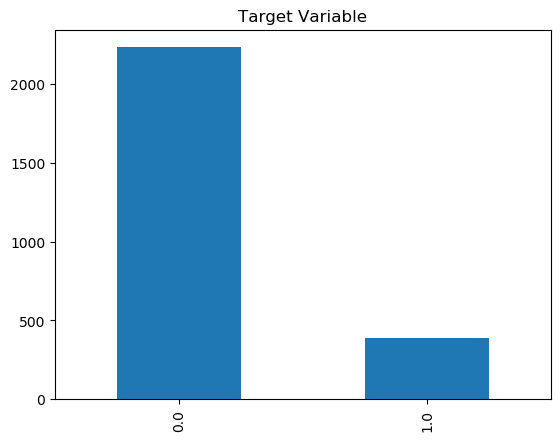

In [225]:
df['RESP'].value_counts().plot.bar()
plt.title("Target Variable")
plt.show()

In [226]:
numeric_data['ln total net sales'].value_counts()

4.584967    15
4.219508    11
4.356709     9
5.062595     7
4.532599     7
            ..
7.254991     1
4.499032     1
5.217324     1
4.774744     1
5.788614     1
Name: ln total net sales, Length: 2228, dtype: int64

# Segregating data into dependent and independent variables

In [227]:
X= df.drop(["RESP"],1)
y = df.RESP

# Splitting the dataset into the training set and test set

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

# Feature Scaling

Using Min-Max Scaler for Normalization

In [292]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
X_train = MM.fit_transform(X_train)
X_test = MM.transform(X_test)

# Part 3: Modelling Phase

# Classification Models:Develop a classification model that will maximize profits for direct-mail marketing.

# Model 1 : Logistic Regression

In [293]:
from sklearn.linear_model import LogisticRegression
classifier_LR= LogisticRegression(random_state=0)
classifier_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
y_pred_LR = classifier_LR.decision_function(X_test)

# Accuracy from Logistic Regression

In [295]:
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn
y_pred_l = classifier_LR.predict(X_test)
cm_LR=confusion_matrix(y_test,y_pred_l)
print(cm_LR)
accuracy_score(y_test, y_pred_l)

[[555  16]
 [ 67  17]]


0.8732824427480916

# Model 2 : SVM Classifier

In [296]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)


# Accuracy from SVM Classifier

In [297]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred_s = model_SVC.predict(X_test)
cm_svm=confusion_matrix(y_test,y_pred_s)
print(cm_svm)
accuracy_score(y_test, y_pred_s)

[[571   0]
 [ 84   0]]


0.8717557251908397

# Model 3 :  Random Forest Classifier

In [298]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred_rf = classifier.predict_proba(X_test)


# Accuracy from Random Forest Classifier

In [299]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_r = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_r)
print(cm)
accuracy_score(y_test, y_pred_r)

[[550  21]
 [ 67  17]]


0.8656488549618321

# Model 4 : XGB Classifier

In [300]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred_xg = classifier.predict_proba(X_test)

# Accuracy from XGB Classifier

In [301]:
y_pred_x = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_x)
print(cm)
accuracy_score(y_test, y_pred_x)

[[538  33]
 [ 65  19]]


0.850381679389313

# Ensembles Method (Voting Classifier)

You can train your model using diverse algorithms and then ensemble them to predict the final output. Say, you use a Random Forest Classifier, SVM Classifier, Linear Regression etc.;
models are pitted against each other and selected upon best performance by voting using the VotingClassifier Class from sklearn.ensemble.

In [302]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [303]:
# group / ensemble of models 
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=200, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier( estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3,eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']): 
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5) 
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(),label))

Accuracy: 0.86 (+/- 0.00) [Logistic Regression]
Accuracy: 0.86 (+/- 0.00) [Random Forest]
Accuracy: 0.78 (+/- 0.01) [naive Bayes]
Accuracy: 0.86 (+/- 0.00) [Ensemble]


 I used Voting classifier to do extra research that how we can run multiple algorithm together .


A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output
(class) based on their highest probability of chosen class as the output.


# ROC 


An ROC curve  is a graph showing the performance of a classification model at all classification thresholds

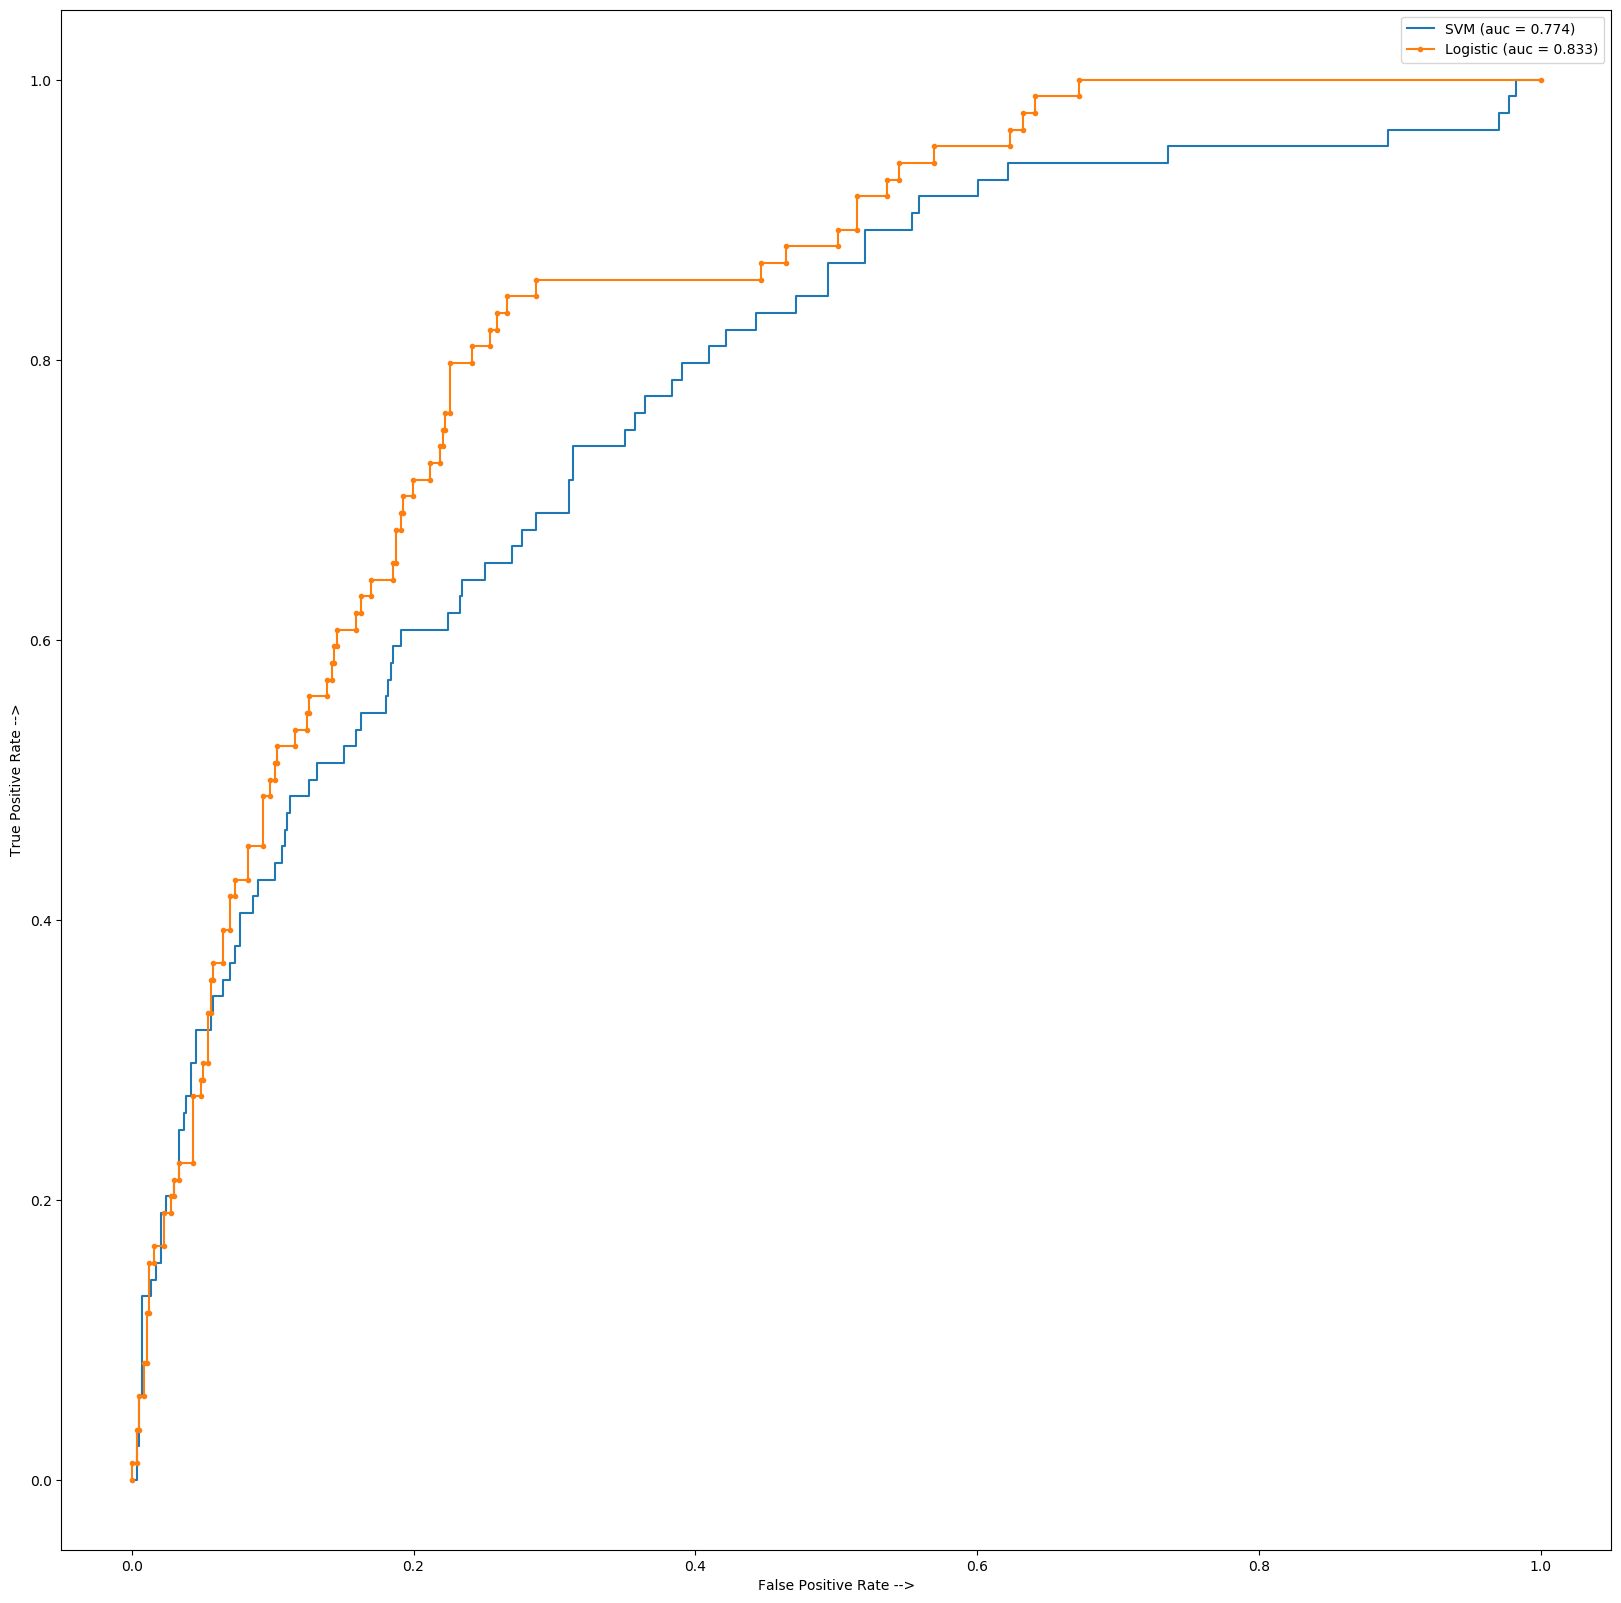

In [311]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_LR)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

#rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
#auc_rf = auc(rf_fpr, rf_tpr)

#xg_fpr, xg_tpr, threshold = roc_curve(y_test, y_pred_xg)
#auc_xg = auc(xg_fpr, xg_tpr)

plt.figure(figsize=(20, 20), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_rf)
#plt.plot(xg_fpr, xg_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_xg)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

This ROC curve shows highest true positive rate of Logistic Regression.

AUC for Logistic Regression : .833
AUC for SVM : .774

In AUC 0.7 to 0.8 is considered very good score.

# Part 4 : Model Evaluation Techniques for the Classification Task : Accuracy

A good classification model should be sensitive, meaning that it should identify a high proportion of the customers who are positive (have high profit).
A classification model also needs to be specific, meaning that it should identify a high proportion of the customers who are negative (have low profit).

# Accuracies for all model:

Best Classification Model  ---->  Logistic Regression have accuracy : 87.32%
            
                    ----->  SVM have accuracy :87.17%
            
            -----> Random Forest : 86.56 %
           
           ----->  XG Boost Classifier : 85.03 %
           
            
            

# Model Evaluation Techniques for the Classification Task - Sensitivity and Specificity


# Sensitivity(Recall) and Precision Calculation for all models :

In [307]:
print("Logistic Regression: " )


print(sklearn.metrics.classification_report(y_test, y_pred_l))

print("-----------------------------------------------------------")

print("SVM: " )

print(sklearn.metrics.classification_report(y_test, y_pred_s))

print("------------------------------------------------------------")

print("Random Forest :" )

print(sklearn.metrics.classification_report(y_test, y_pred_r))


print("------------------------------------------------------------")

print ("XGBoost Classifier:") 

print(sklearn.metrics.classification_report(y_test, y_pred_x))


print("------------------------------------------------------------")

Logistic Regression: 
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       571
         1.0       0.52      0.20      0.29        84

    accuracy                           0.87       655
   macro avg       0.70      0.59      0.61       655
weighted avg       0.84      0.87      0.85       655

-----------------------------------------------------------
SVM: 
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       571
         1.0       0.00      0.00      0.00        84

    accuracy                           0.87       655
   macro avg       0.44      0.50      0.47       655
weighted avg       0.76      0.87      0.81       655

------------------------------------------------------------
Random Forest :
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       571
         1.0       0.45      0.20      0.28        84

    accuracy     

# Conclusion :

 Maximum Sensitivity also called recall (REC) or true positive rate (TPR) have higher from Logistic Model which is .89 which
is great. A good classification model should be sensitive, meaning that it should identify a high proportion of the customers
who are positive (have high profit) and will maximize profits for direct-mail marketing.

Analysis Steps followed in this data :

1: Data Preprocessing phase : First I read the data and did data cleaning in this phase like removing null values.

2 : EDA : Used histogram to show how variables are correlated and used VIF factor, It provides an index that measures
        how much the variance  (the square of the estimate's standard deviation) of an estimated regression coefficient 
         is increased because of collinearity.

3: Modelling : I tried different-different classification model for maximizing the profit of direct-mail marketing.From all
               of the model got maximum accuracy from Logistic Model which is 87%. 
                                
4 : Evalutaion phase : In this phase I calculated sensitivity and specificity for every model ,which model have more sensitivity 
                        is best model for maximizing the profit(Here is Logistic and have higher sensitivity which is .89.)
    